In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import mne
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

In [234]:
df_8 = pd.read_csv('8hz_pg1.csv')
df_10 = pd.read_csv('10hz_pg1.csv')
df_12 = pd.read_csv('12hz_pg1.csv')
df_14 = pd.read_csv('14hz_pg1.csv')

<h2> FILTER </h2>


In [235]:
fs = 250.0                      # Hz; sampling rate
dt = 1000. / fs                 # ms; time between samples
sdt = np.round(dt).astype(int); # rounded dt so that we can index samples
hp = 6                        # Hz; our low cut for our bandpass
lp = 16                        # Hz; our high cut for our bandpass
num_taps = 31                   # Number of taps/coefficients of FIR filter

# Create our filter coefficients
# Note: by defining 'fs' we don't divide our windows by the Nyquist
# Note: for FIR filters, a is always 1
b = signal.firwin(numtaps=num_taps, cutoff=[hp, lp], pass_zero='bandpass', fs=fs)
a = 1

<h2> Channel 1 - 8hz </h2>

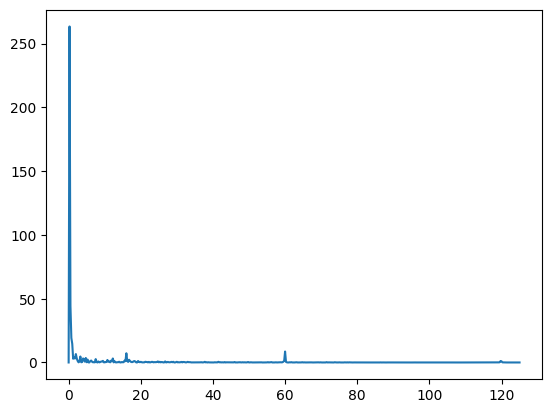

In [262]:
chan1_test = df_8.iloc[1500:2500, 1]
freqs, psd = signal.periodogram(chan1_test, 250.0)

plt.plot(freqs, psd)
plt.show()


In [178]:
 # Filter the epoch (non-causal, zero-phase filter)
filt_8hz = signal.filtfilt(b, a, chan1_8hz, axis=0)

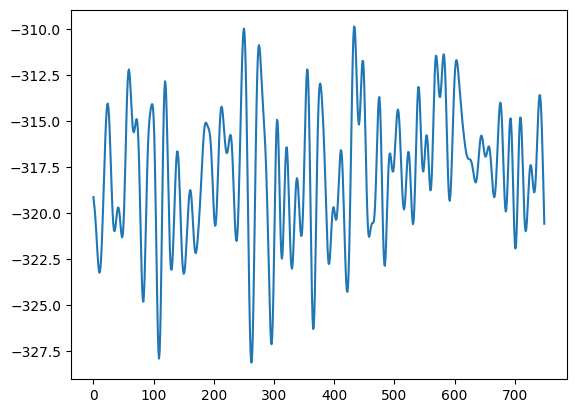

In [179]:
plt.plot(filt_8hz)

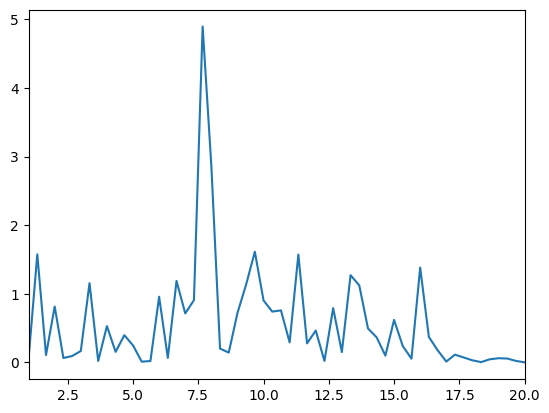

The max = [7.66666667]


In [248]:
freqs_8hz, psd_8hz = signal.periodogram(filt_8hz, 250.0)

plt.plot(freqs_8hz, psd_8hz)
plt.xlim([1, 20])
plt.show()
#max(psd)
max_8hz = freqs_8hz[np.where(psd_8hz==max(psd_8hz))]
print(f'The max = {max_8hz}')


<h2>Channel 1 - 10hz</h2

In [183]:
chan1_10hz = df_10.iloc[3750:5500, 1]

In [184]:
 # Filter the epoch (non-causal, zero-phase filter)
filt_10hz = signal.filtfilt(b, a, chan1_10hz, axis=0)

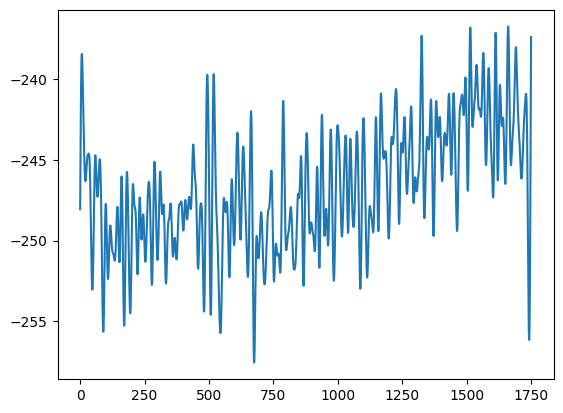

In [185]:
plt.plot(filt_10hz)

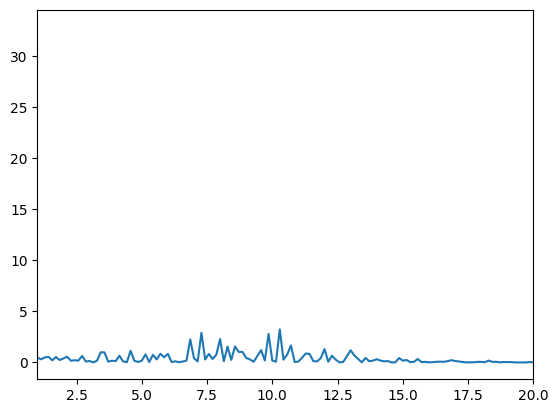

array([0.14285714])

In [186]:
freqs_10hz, psd_10hz = signal.periodogram(filt_10hz, 250.0)

plt.plot(freqs_10hz, psd_10hz)
plt.xlim([1, 20])
plt.show()
freqs_10hz[np.where(psd_10hz==max(psd_10hz))]

In [187]:
#cut out lower range values less than 3 - turn to nan

for i in range(len(freqs_10hz)):
    if freqs_10hz[i] < 3:
        freqs_10hz[i] = np.nan
        psd_10hz[i] = np.nan

In [188]:
#Remove nan values

freqs_10hz_removed = freqs_10hz[~np.isnan(freqs_10hz)]
psd_10hz_removed = psd_10hz[~np.isnan(psd_10hz)]

The max = [10.28571429]


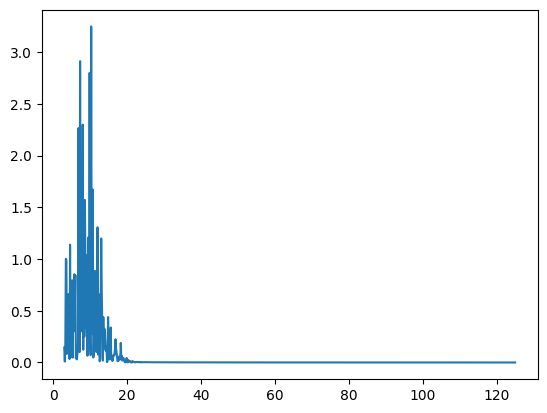

In [249]:
plt.plot(freqs_10hz_removed, psd_10hz_removed)
max_10hz = freqs_10hz_removed[np.where(psd_10hz_removed==max(psd_10hz_removed))]
print(f'The max = {max_10hz}')

<h2> Channel 1 - 12 hz </h2>

In [191]:
chan1_12hz = df_12.iloc[3750:5500, 1]


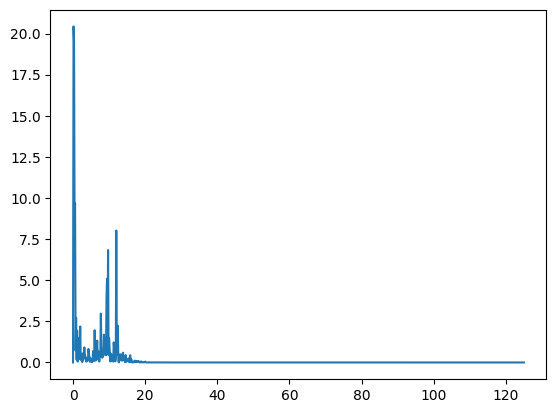

In [193]:
freqs_12hz, psd_12hz = signal.periodogram(filt_12hz, 250.0)

plt.plot(freqs_12hz, psd_12hz)

In [194]:
 # Filter the epoch (non-causal, zero-phase filter)
filt_12hz = signal.filtfilt(b, a, chan1_12hz, axis=0)


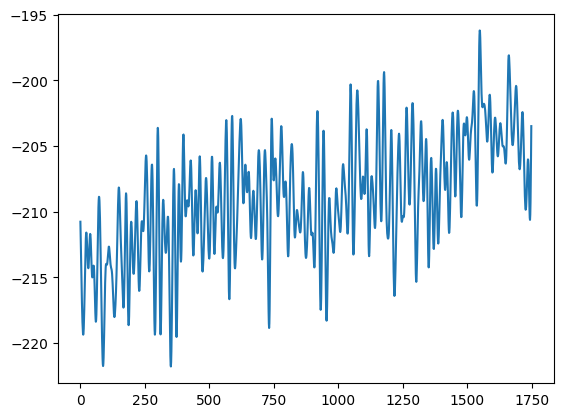

In [195]:
plt.plot(filt_12hz)

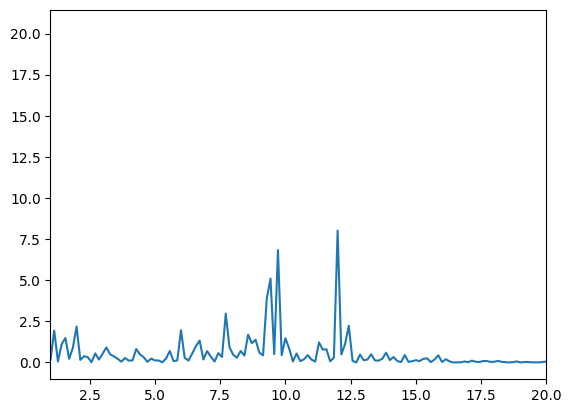

array([0.14285714])

In [199]:
freqs_12hz, psd_12hz = signal.periodogram(filt_12hz, 250.0)

plt.plot(freqs_12hz, psd_12hz)
plt.xlim([1, 20])
plt.show()
freqs_12hz[np.where(psd_12hz==max(psd_12hz))]

In [200]:
#cut out lower range values less than 3 - turn to nan

for i in range(len(freqs_12hz)):
    if freqs_12hz[i] < 3:
        freqs_12hz[i] = np.nan
        psd_12hz[i] = np.nan

In [201]:
#Remove nan values

freqs_12hz_removed = freqs_12hz[~np.isnan(freqs_12hz)]
psd_12hz_removed = psd_12hz[~np.isnan(psd_12hz)]

The max = [12.]


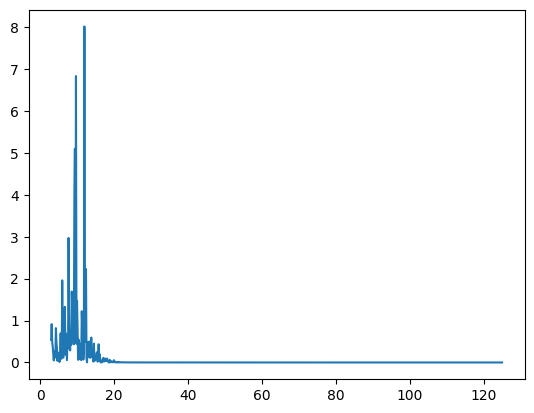

In [251]:
plt.plot(freqs_12hz_removed, psd_12hz_removed)
max_12hz = freqs_12hz_removed[np.where(psd_12hz_removed==max(psd_12hz_removed))]
print(f'The max = {max_12hz}')

<h2>Channel 1 - 14hz</h2>

In [236]:
chan1_14hz = df_14.iloc[3750:5500, 1]

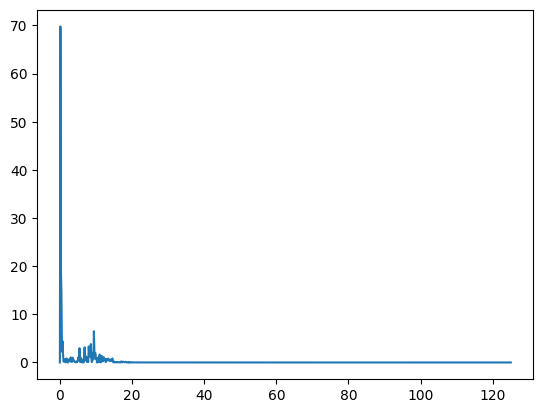

In [237]:
freqs_14hz, psd_14hz = signal.periodogram(filt_14hz, 250.0)

plt.plot(freqs_14hz, psd_14hz)

In [238]:
 # Filter the epoch (non-causal, zero-phase filter)
filt_14hz = signal.filtfilt(b, a, chan1_14hz, axis=0)

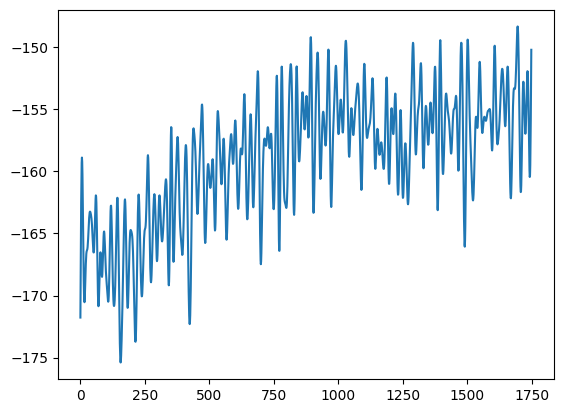

In [239]:
plt.plot(filt_14hz)


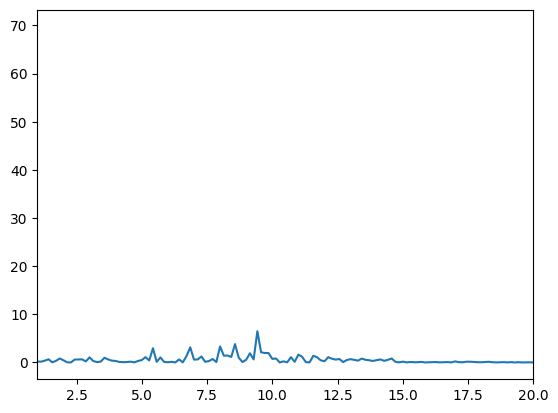

array([0.14285714])

In [240]:
freqs_14hz, psd_14hz = signal.periodogram(filt_14hz, 250.0)

plt.plot(freqs_14hz, psd_14hz)
plt.xlim([1, 20])
plt.show()
freqs_14hz[np.where(psd_14hz==max(psd_14hz))]

In [241]:
#cut out lower range values less than 3 - turn to nan

for i in range(len(freqs_14hz)):
    if freqs_14hz[i] <= 3:
        freqs_14hz[i] = np.nan
        psd_14hz[i] = np.nan

In [242]:
#Remove nan values

freqs_14hz_removed = freqs_14hz[~np.isnan(freqs_14hz)]
psd_14hz_removed = psd_14hz[~np.isnan(psd_14hz)]

The max = [9.42857143]


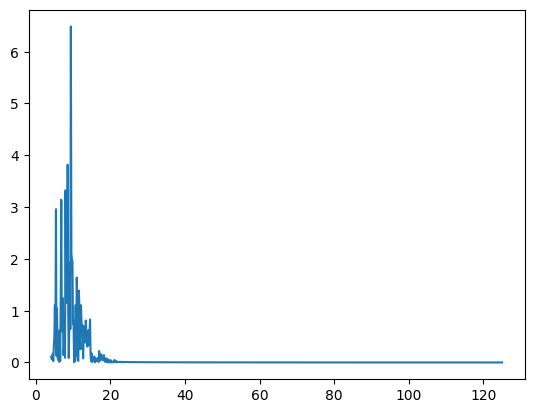

In [252]:
plt.plot(freqs_14hz_removed, psd_14hz_removed)
max_14hz = freqs_14hz_removed[np.where(psd_14hz_removed==max(psd_14hz_removed))]
print(f'The max = {max_14hz}')

In [259]:
print(f'8hz Max = {float(max_8hz)}')
print(f'10hz Max = {float(max_10hz)}')
print(f'12hz Max = {float(max_12hz)}')
print(f'14hz Max = {float(max_14hz)}')

8hz Max = 7.666666666666666
10hz Max = 10.285714285714285
12hz Max = 12.0
14hz Max = 9.428571428571429
